In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

In [5]:
df = pd.read_csv("winequality-red.csv",delimiter = ';')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

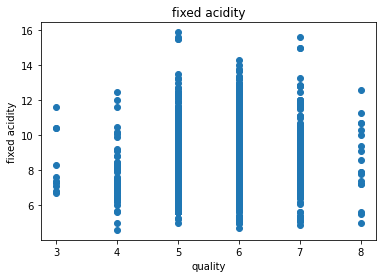

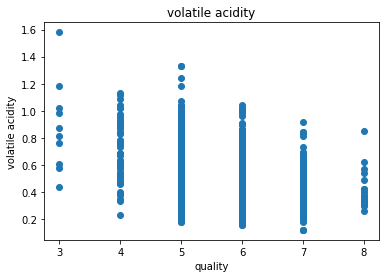

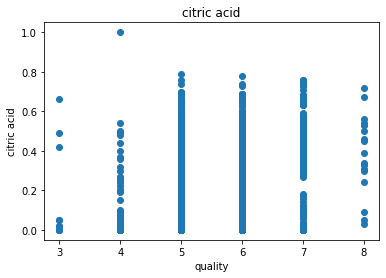

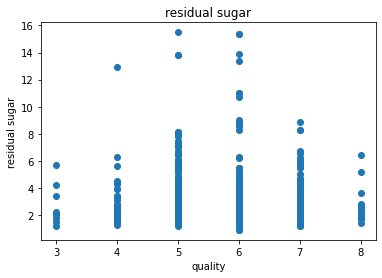

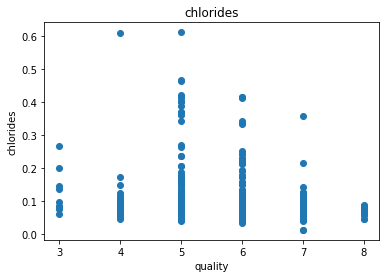

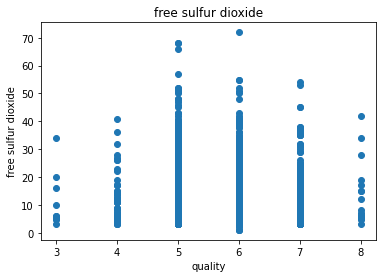

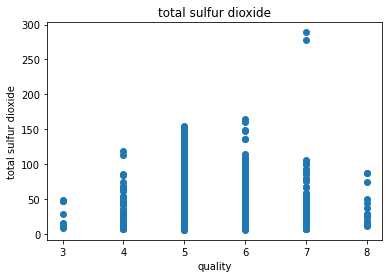

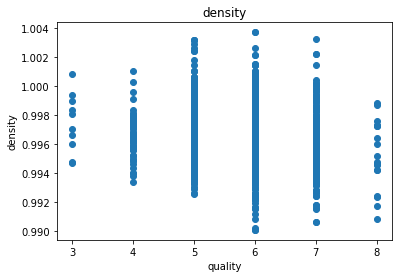

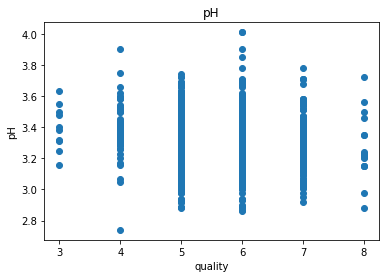

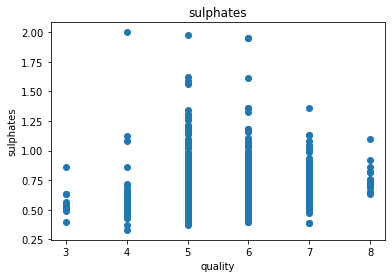

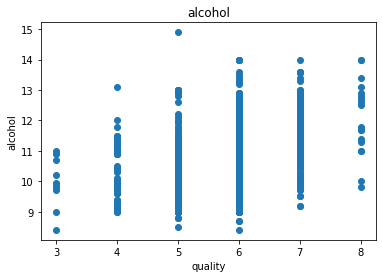

In [12]:
for feature in df.columns[:-1]:
    plt.scatter(df['quality'],df[feature])
    plt.title(feature)
    plt.xlabel('quality')
    plt.ylabel(feature)
    plt.show()

In [13]:
#0 means bad quality and 1 means good quality
df['quality'] = pd.cut(df['quality'],bins=[0,7.5,10],labels=[0,1]) 

In [14]:
df['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: category
Categories (2, int64): [0 < 1]

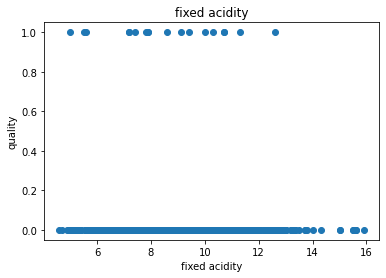

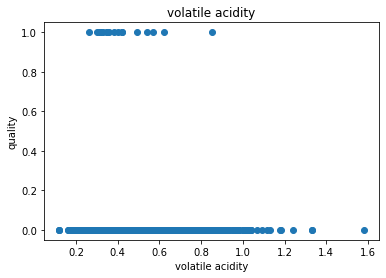

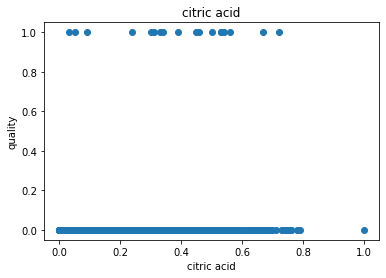

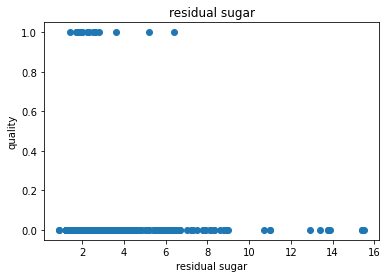

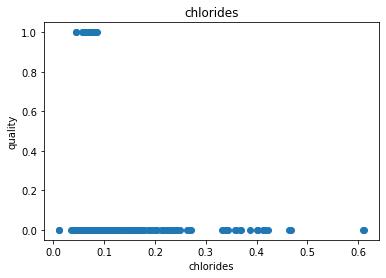

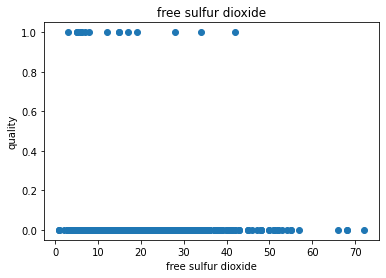

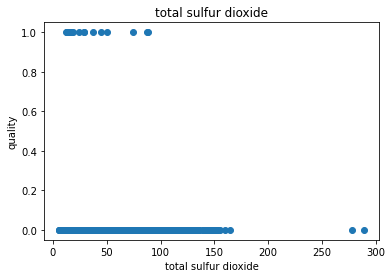

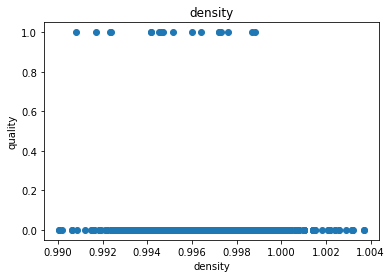

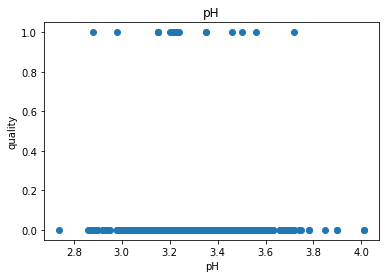

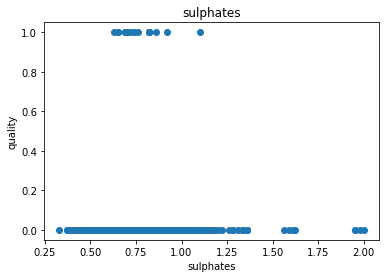

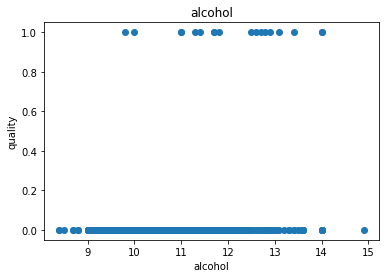

In [16]:
for feature in df.columns[:-1]:
    plt.scatter(df[feature],df['quality'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('quality')
    plt.show()

In [17]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# K Nearest Neighbors Classifier


In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       315
           1       0.00      0.00      0.00         5

    accuracy                           0.98       320
   macro avg       0.49      0.50      0.50       320
weighted avg       0.97      0.98      0.98       320

0.98125


## Decision Tree Classifier


In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       315
           1       0.12      0.20      0.15         5

    accuracy                           0.97       320
   macro avg       0.56      0.59      0.57       320
weighted avg       0.97      0.97      0.97       320



## Random Forest Classifier


In [30]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test,rf_pred))

0.984375


## Stochastic Gradient Descent


In [33]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
sgd_pred = sgd.predict(X_test)
print(accuracy_score(y_test,sgd_pred))

0.984375


## Building a Wine quality predictor 

In [36]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

x = np.asarray(input_data)

x = x.reshape(1,-1)

prediction = sgd.predict(x)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
